In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation, Dropout, Flatten, Dense
 


In [2]:
#conv layers
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = (150,150,3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))




In [3]:
#fully connected layers
model.add(Flatten())  
 
model.add(Dense( activation = 'relu', units=64))
model.add(Dense( activation = 'softmax', units=3)) 
 


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_set = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        class_mode='categorical')

Found 1050 images belonging to 3 classes.


In [8]:
test_set = test_datagen.flow_from_directory(
        'data/test',
        target_size=(150, 150),
        class_mode='categorical')

Found 105 images belonging to 3 classes.


In [9]:
model.fit(train_set,epochs=5,validation_data=test_set)


Epoch 1/5
33/33 [==============================] - 61s 2s/step - loss: 0.9734 - accuracy: 0.5171 - val_loss: 0.8789 - val_accuracy: 0.5905
Epoch 2/5
33/33 [==============================] - 47s 1s/step - loss: 0.5932 - accuracy: 0.7543 - val_loss: 0.7517 - val_accuracy: 0.7238
Epoch 3/5
33/33 [==============================] - 48s 1s/step - loss: 0.4719 - accuracy: 0.8152 - val_loss: 0.9845 - val_accuracy: 0.6762
Epoch 4/5
33/33 [==============================] - 46s 1s/step - loss: 0.3614 - accuracy: 0.8648 - val_loss: 0.9498 - val_accuracy: 0.7143
Epoch 5/5
33/33 [==============================] - 48s 1s/step - loss: 0.3226 - accuracy: 0.8905 - val_loss: 1.0794 - val_accuracy: 0.7143


In [10]:
train_set.class_indices

{'airplane': 0, 'car': 1, 'motorbike': 2}

In [ ]:
#Prediction

In [36]:
## prediction of single new data
import numpy as np
from tensorflow.keras.preprocessing import image
test_image= image.load_img('data/inference/bike.jpg' ,target_size =(150,150))


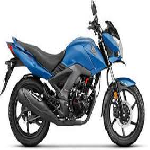

In [37]:
test_image

In [38]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [39]:
test_image.shape

(150, 150, 3)

In [40]:
test_image=test_image.reshape(1,150, 150, 3)

In [41]:
## For single prediction change the dimension using axis. To remove problem of batch
#test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)

In [42]:
result

array([[0., 0., 1.]], dtype=float32)

In [43]:
np.around(result)

array([[0., 0., 1.]], dtype=float32)

In [44]:
result=result.argmax()

In [45]:
result

2

In [46]:
## Class label of dog and cat

if result == 0:
    prediction = 'airplane'
elif result == 1:
    prediction = 'car'
else:
    prediction = 'bike'
    

In [47]:
prediction

'bike'